# Convolutional Neural Network

In [1]:
import numpy as np
import pandas as pd
import random as rd
from datetime import datetime
import jupyprint.jupyprint as jp
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '../00_Classes')
import CNN_Class

CNN = CNN_Class.MyCNN()

## Train and Test Mnist Conv

In [3]:
# Load data
images = CNN.load_MNIST_images('MNIST_data/t10k-images-idx3-ubyte.gz')
labels = CNN.load_MNIST_labels('MNIST_data/t10k-labels-idx1-ubyte.gz')


CNN.Rng(1)												# imposto il seme per la generazione di numeri casuali sia per np.random che per random.

W1 = 1e-2 * np.random.randn(9, 9, 20)									
W5 = (2 * np.random.rand(100, 2000) - 1) * np.sqrt(6) / np.sqrt(360 + 2000)
Wo = (2 * np.random.rand(10, 100) - 1) * np.sqrt(6) / np.sqrt(10 + 100)

X = images[:7000 ,: ,:]
D = labels[:7000]

In [ ]:


# np.random.seed(1)

# W1 = 1e-2 * np.random.randn(9, 9, 20)
# W5 = (2 * np.random.rand(100, 2000) - 1) * np.sqrt(6) / np.sqrt(360 + 2000)
# Wo = (2 * np.random.rand(10, 100) - 1) * np.sqrt(6) / np.sqrt(10 + 100)

X = images[:7000 ,: ,:]
D = labels[:7000]

# Training
for epoch in range(10):
	print("Epoch:", epoch + 1)
	W1, W5, Wo = SGD_MnistConv(W1, W5, Wo, X, D)

# Save model weights
with h5py.File('MnistConv.h5', 'w') as hf:
	hf.create_dataset('W1', data=W1)
	hf.create_dataset('W5', data=W5)
	hf.create_dataset('Wo', data=Wo)

# Evaluation
X_test = Images[:, :, 7001:10000]
D_test = Labels[7001:10000]
acc = 0
N = len(D_test)

for k in range(N):
	print("Sample:", k + 1)
	x = X_test[:, :, k]
	y1 = Conv(x, W1)
	y2 = ReLU(y1)
	y3 = Pool(y2)
	y4 = y3.flatten()
	v5 = np.dot(W5, y4)
	y5 = ReLU(v5)
	v = np.dot(Wo, y5)
	y = Softmax(v)
	
	i = np.argmax(y)
	if i == D_test[k]:
		acc += 1

acc = acc / N
print('Accuracy is %f' % acc)


NameError: name 'loadMNISTImages' is not defined

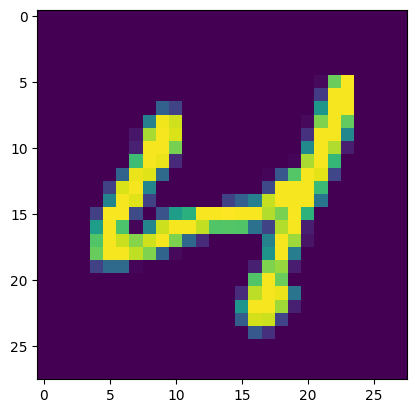

In [ ]:
import matplotlib.pyplot as plt
# image = np.asarray(images[0]).squeeze()
plt.imshow(images[535])
plt.show()

Pool

In [ ]:
def Pool(x):
	xrow, xcol, numFilters = x.shape
	y = np.zeros((xrow // 2, xcol // 2, numFilters))
	
	for k in range(numFilters):
		filter = np.ones((2, 2)) / 4  # Creiamo un filtro di media 2x2
		image = convolve2d(x[:, :, k], filter, mode='valid')  # Calcoliamo la media su 4 pixel
		y[:, :, k] = image[::2, ::2]  # Prendiamo la media e la mettiamo in un pixel ogni 4
	 
	return y

# Esempio di utilizzo:
x = np.random.rand(6, 6, 3)  # Creiamo un esempio di input 6x6 con 3 filtri
y = pool(x)
print(y)


In [ ]:
# def SGD_DL(w_per_layer, input_image, correct_outputs, LRA = 0.001, LRB):
# 	momentum_1 = np.zeros_like(W1)
# 	momentum_5 = np.zeros_like(W5)
# 	momentum_o = np.zeros_like(Wo)

# 	N = len(correct_outputs)													# Numero di campioni.
# 	h = [[] for _ in range(N)]												# Lista di combinazioni lineari tra pesi e inputs:\
# 																			# Righe		: 	combinazioni lineari per campione.\
# 																			# Colonne	: 	combinazioni lineare tra gli input e i pesi\ 
# 																			# 				leggendo gli strati da sinistra a destra.
# 																			# Es. 	se ho 5 layer (1 input_L, 3 hidden_L, 1 output_L)\
# 																			# 		da 25, 20, 20, 20, 5 neuroni, avrò 4 vettori di \
# 																			# 		combinazioni lineari lunghi rispettivamente\
# 																			# 		20, 20, 20, 5.

# 	container_output_prob = [[] for _ in range(N)]							# Lista che conterrà gli output convertiti in valori probabilistici.
# 	container_weights = [[] for _ in range(N+1)]							# Lista che conterrà tutti gli aggiornamenti dei pesi.
# 	container_weights[0] = w_per_layer										# Inserisco nella lista dei pesi quelli iniziali forniti dall'utente.

# 	# ciclo ad ogni campione ---------------------------------------------- #
# 	for k in range(N):														
		
# 		a = [input_image[:, :, k].flatten()]								# Salvo i valori iniziali dei neuroni assegnati in input\
# 																			# relativi al campione k-esimo.	
																					
# 		# ciclo di training FORWARD --------------------------------------- #
# 		for i, w in enumerate(container_weights[k]):						# Ciclo in cui vengono applicati i pesi strato per strato.
# 			h[k] += [w @ a[i]]												# Combinazione lineare tra pesi e inputs con dimensione\ 
# 																			# finale pari al numero di neuroni nel layer successivo.
# 			if i != (len(container_weights[k]) - 1):						# Applico la funzione di attivazione ReLU solamente ai layer interni.
# 				a += [self.ReLU(h[k][i])]									# Salvo gli output (ReLU(h)) come valori di input (a) per il layer\ 
# 																			# successivo.
# 			else:
# 				a += [self.Softmax(h[k][i])]								# All'ultimo output applico la funzione Softmax per trasformare il\
# 																			# vettore reale in vettore di probabilità la cui somma totale è pari a 1.
# 				container_output_prob[k] = a[-1]							# Salvo i vettori probabilità nella lista precedentemente definita.
		
# 		# ciclo di training BACKWARD -------------------------------------- #
# 		for i in range(len(container_weights[k])):									
# 			if i == 0:														# Al primo ciclo definisco la funzione di costo derivata utilizzando\ 
# 																			# come metrica la MSE.
# 				E = correct_outputs[k,:]									# Vettore di output attesi sull'output layer.
# 				P = h[k][-1]												# Vettore di output predetti: Non considero l'applicazione della\ 
# 																			# Softmax, poiché è una funzione utile solamente per convertire i\
# 																			# risultati in probabilità e non contribuisce al processo di correzione\
# 																			# dei pesi.
# 				f_cost_der = 2 * (P - E)									# Vettore funzione di costo derivata.
# 				delta = f_cost_der											# Prima delta per la retropropagazione degli errori.
# 			else:
# 				f_cost_der = container_weights[k][-i].T @ delta				# Applico a ritroso i pesi alle funzioni di costo sui layer precedenti.
# 																			# Es. Prodotto interno tra i pesi sull'ultimo Hidden Layer\ 
# 																			# (di dimensioni MxN) e la delta (di dimensioni (Mx1)): dim finale = Nx1.						
# 				ReLU_der = np.where(a[-(i+1)] > 0, 1, 0)					# Derivata del vettore ReLU. Es. di prima: ReLU dell'ultimo HL (dim = Nx1).
# 				delta = ReLU_der * f_cost_der								# Delta relativa al layer in esame (dim = Nx1).
# 			dW = LR * np.outer(delta, a[-(i+2)])							# Calcolo la correzione dei pesi, che corrisponde al prodotto esterno tra\
# 																			# delta (Nx1) e gli input (Sx1): dim finale = NxS.
# 			w = np.copy(container_weights[k][-(i+1)])						# Copio il valore degli ultimi pesi in esame per evitare di sovrascrivere\
# 																			# i pesi contenuti nella lista durante la correzione.
# 			w -= dW															# Aggiorno i pesi.
# 			container_weights[k+1].insert(0, w)								# Salvo i pesi nella lista definita in precedenza. L'ultima riga contiene\
# 																			# i pesi finali.

# 	return (container_weights, container_output_prob)

In [4]:
def SGD_MnistConv(W1, W5, Wo, X, D, LRA = 0.001, LRB = 0.95):
	momentum_1 = np.zeros_like(W1)								# Definisco i contenitori per le correzioni dei pesi.
	momentum_5 = np.zeros_like(W5)
	momentum_o = np.zeros_like(Wo)


	N = len(D)													
	bsize = 100  												# Definisco i batch (set di immagini).			
	blist = range(0, N - bsize + 1, bsize)						

	for batch in blist:
		dW1 = np.zeros_like(W1)									# Definisco i contenitori per le correzioni dei pesi moltiplicati per LRA.
		dW5 = np.zeros_like(W5)
		dWo = np.zeros_like(Wo)


		begin = batch
		for k in range(begin, begin + bsize):					# Valuto solo le immagini nel range in esame.
			
			# Forward
			x = X[k, :, :]										# Estraggo la singola immagine (28x28).
			y1 = CNN.Conv(x, W1)								# Applico il filtro di convoluzione.
			print(y1.shape)
			y2 = CNN.ReLU(y1)									# Applico la ReLU per schiacciare i dati pesati.
			print(y2.shape)
			y3 = CNN.Pool(y2)									# Applico il filtro di Pooling
			print(y3.shape)
			y4 = y3.reshape(-1)									# 
			print(y4.shape)
			y5 = CNN.ReLU(W5 @ y4)								# Applico la ReLU per schiacciare i dati pesati.
			print(y5.shape)
			v = Wo @ y5											# Calcolo la combinazione lineare per ottenere i dati di output.
			print(v.shape)
			predicted = CNN.Softmax(v)							# All'ultimo output applico la funzione Softmax per trasformare il\
																# vettore reale in vettore di probabilità la cui somma totale è pari a 1.

			# Backward
			expected = np.zeros(10)								# Creo il vettore di valori attesi, lungo quanto i neuroni dell'output layer
			expected[D[k] - 1] = 1								# 

			f_cost_der = 2 * (predicted - expected)
			delta = f_cost_der
			dWo += np.outer(delta, y5)

			f_cost_der_5 = Wo.T @ delta																						
			ReLU_der_5 = np.where(y5 > 0, 1, 0)				
			delta_5 = ReLU_der_5 * f_cost_der_5	
			dW5 += np.outer(delta_5, y4)

			f_cost_der_4 = W5.T @ delta_5
			f_cost_der_3 = f_cost_der_4.reshape(y3.shape)
			f_cost_der_2 = np.zeros_like(y2)
			
			W3 = np.ones_like(y2) / (2 * 2)

			for c in range(20):
				f_cost_der_2[c, :, :] = np.kron(f_cost_der_3[c, :, :], np.ones((2, 2))) * W3[c, :, :]

			ReLU_der_2 = np.where(y2 > 0, 1, 0)	
			delta_2 = ReLU_der_2 * f_cost_der_2

			delta_1 = np.zeros_like(W1)
			for c in range(20):
				delta_1[c, :, :] = np.rot90(np.convolve(x, np.rot90(delta_2[c, :, :], 2), mode='valid'), 2)
			dW1 += delta_1

		dW1 /= bsize
		dW5 /= bsize
		dWo /= bsize

		momentum_1 = LRA * dW1 + LRB * momentum_1
		W1 -= momentum_1

		momentum_5 = LRA * dW5 + LRB * momentum_5
		W5 -= momentum_5

		momentum_o = LRA * dWo + LRB * momentum_o
		Wo -= momentum_o

	return W1, W5, Wo

SGD_MnistConv(W1, W5, Wo, X, D, 0.01, 0.95)

AttributeError: 'MyCNN' object has no attribute 'Conv'